# Лабораторная работа 3
*********
## Статистические методы обучения. Метод опорных векторов

На этом занятии компьютерного практикума Вы изучите метод опорных векторов (англ. SVM, Support Vector Machine) и примените данный метод для решения задачи классификации различных двумерных наборов данных. В последних публикациях на русском языке метод называется также машинами поддерживающих векторов, или, в более общем смысле, ядерными машинами (англ. Kernel Machine). В методах, основанных на их использовании, предусмотрен эффективный механизм обучения, а сами они позволяют представить сложные, нелинейные функции.   

Ядерные машины превосходят все другие способы распознавания рукописных символов, в частности цифр; кроме того, они быстро находят применение и в других приложениях, особенно в тех, которые отличаются большим количеством входных характеристик. Прежде чем приступить, собственно, к программированию, настоятельно рекомендуется ознакомиться с материалом лекций, а также с дополнительными материалами, имеющими отношение к задачам классификации.


In [1]:
# импортирую все необходимые библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import math
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import svm
import scipy.io

## Часть 1: Загрузка и визуализация данных

Как было сказано выше, Вы будете использовать метод опорных векторов для классификации 2-мерных наборов данных. В ходе работы над упражнением вы изучите собственно метод, а также научитесь использовать с SVM ядро Гаусса.

In [9]:
mat = scipy.io.loadmat('./data/ex3data1.mat')
X = mat["X"]
y = mat["y"]

In [26]:
def plotData(X, y):
  # ====================== Ваш код здесь ======================
  # Указание: Реализуйте функцию, которая будет визуализировать набор данных
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()

    plt.figure(figsize=(8, 6))
    # Положительные примеры
    plt.scatter(X[pos, 0], X[pos, 1],
                marker='+', s=80, label='Положительный класс (y=1)')
    # Отрицательные примеры
    plt.scatter(X[neg, 0], X[neg, 1],
                marker='o', facecolors='none', edgecolors='r',
                label='Отрицательный класс (y=0)')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Визуализация данных')
    plt.legend()
    plt.grid(True)


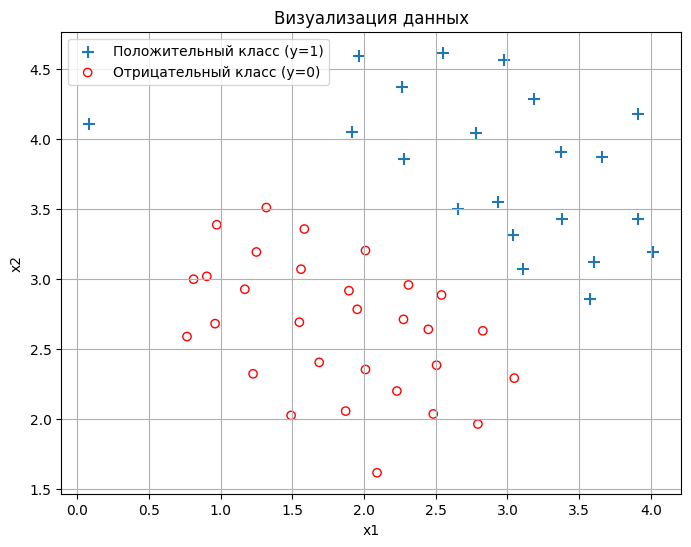

In [6]:
plotData(X, y)

## Часть 2: Обучение линейного классификатора SVM

In [10]:
def svmTrain(X, y, C, kernelFunction, tol=1e-3, max_passes=-1, sigma=0.1):
    y = y.flatten()

    if kernelFunction == "gaussian_rbf":
        clf = svm.SVC(C = C, kernel="rbf", tol=tol, max_iter=max_passes, verbose=2)
        return clf.fit(gaussianKernelGramMatrix(X,X, sigma=sigma), y)

    else:
        clf = svm.SVC(C = C, kernel=kernelFunction, tol=tol, max_iter=max_passes, verbose=2)
        return clf.fit(X, y)

In [27]:
def visualizeBoundaryLinear(X, y, model, c):
    w = model.coef_[0]
    b = model.intercept_[0]
    xp = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    yp = - (w[0] * xp + b) / w[1]

    plt.plot(xp, yp, linewidth = 3, color = 'blue', label='Граница классов')
    plt.legend(fontsize=15)
    plt.title('\n C = {:d} \n'.format(c), fontsize=20)

[LibSVM]

<Figure size 1200x600 with 0 Axes>

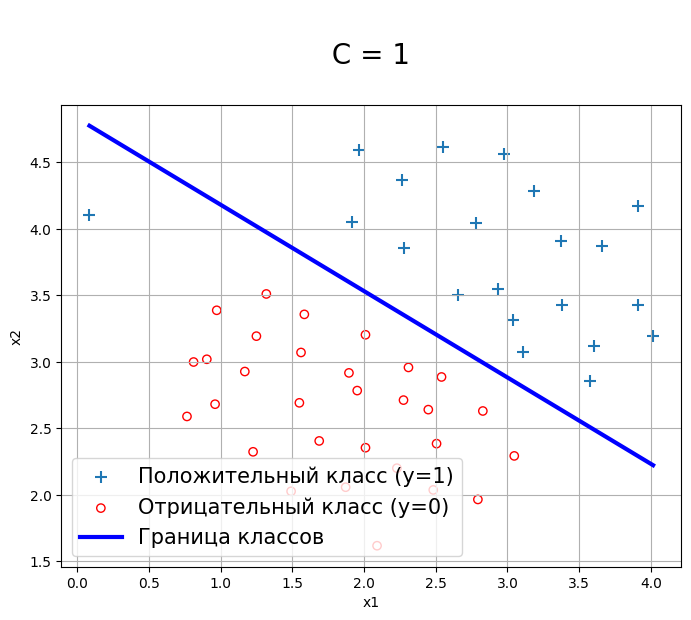

[LibSVM]

<Figure size 1200x600 with 0 Axes>

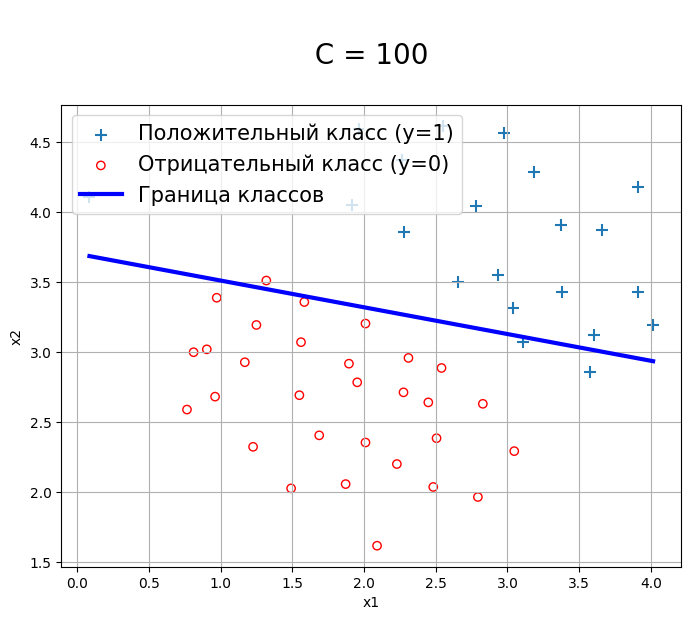

[LibSVM]

<Figure size 1200x600 with 0 Axes>

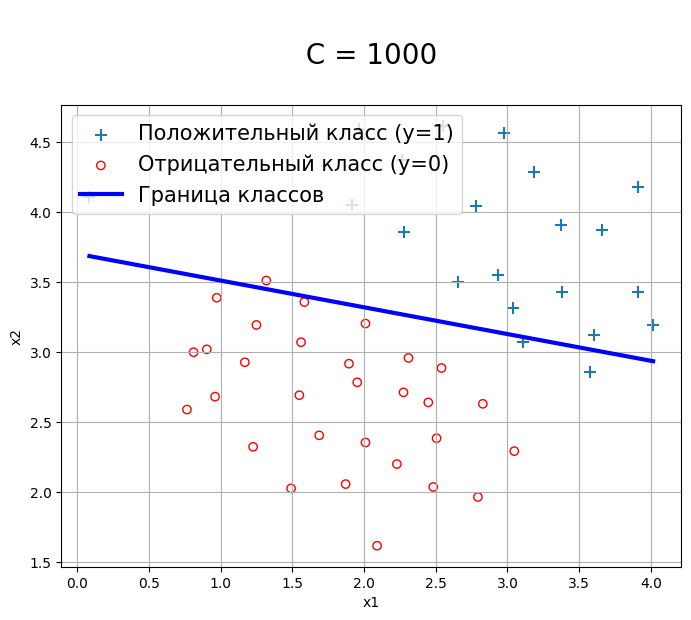

In [29]:
# Ваша задача в этой ячейке проанализировать как влияет параметр С на качество классификаци.
# Получить графики как на рисунках 2,3 и написать вывод.
C = [1, 100, 1000]
for c in C:
    plt.figure(figsize=(12,6))
    plotData(X, y)
    model = svmTrain(X, y, c, "linear", tol=1e-3, max_passes=20)
    visualizeBoundaryLinear(X, y, model, c)
    plt.show()

## Часть 3: Применение радиальной базисной функции (ядра) Гаусса

В этой части упражнения демонстрируется применение метода опорных векторов для нелинейной классификации данных. В частности, предстоит применить SVM с ядром Гаусса в ситуации, когда линейное разделение невозможно.

Для нахождения нелинейных границ с помощью метода опорных векторов, необходимо запрограммировать функцию, реализующую применение ядра Гаусса. Под ядром Гаусса подразумевается функция, определяющая сходство пары образцов на основании оценки расстояния между ними $(х(i), х(j))$. Ядро Гаусса регулируется параметром $σ$, который определяет, насколько быстро уменьшается «схожесть» двух примеров при увеличении расстояния между ними.

Необходимую формулу для реализации функции gaussianKernel, Вы найдете в лабнике

In [31]:
def gaussianKernel(x1, x2, sigma=0.1):
  '''
  sim = gaussianKernel(x1, x2) Под ядром Гаусса подразумевается функция,
  определяющая сходство пары образцов на основании оценки расстояния между ними.
  Возвращаемой величиной является переменная sim

  Следует определить векторы x1 и x2 как векторы-столбцы
  '''
  # ====================== Ваш код здесь ======================
  # Указание: Запрограммируйте функцию, табулирующую близость векторов x1 и x2,
  # вычисляя значение ядра Гаусса, с параметром sigma
  
  # Преобразуем в одномерные массивы
  x1 = x1.flatten()
  x2 = x2.flatten()
  # Разность
  diff = x1 - x2
  # Квадрат нормы
  sq_norm = np.dot(diff, diff)  # то же, что np.linalg.norm(diff)**2
  # Собственно ядро
  sim = np.exp(- sq_norm / (2 * sigma**2))
  return sim

In [32]:
def gaussianKernelGramMatrix(X1, X2, K_function=gaussianKernel, sigma=0.1):
  gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
  for i, x1 in enumerate(X1):
    for j, x2 in enumerate(X2):
      gram_matrix[i, j] = K_function(x1, x2, sigma)
  return gram_matrix

Как только вы закончите написание программы gaussianKernel.m, ноутбук проверит Вашу функцию нахождения ядра на 2-х представленных примерах, в ответе Вы должны будете увидеть следующее значение: 0.324652

In [33]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)

print("Gaussian Kernel between x1 =", x1, ", x2 =", x2, ", sigma =", sigma, ":\n{:f}".format(sim))

Gaussian Kernel between x1 = [1 2 1] , x2 = [ 0  4 -1] , sigma = 2 :
0.324652


## Часть 4: Визуализация обучающего набора 2

<Figure size 1200x800 with 0 Axes>

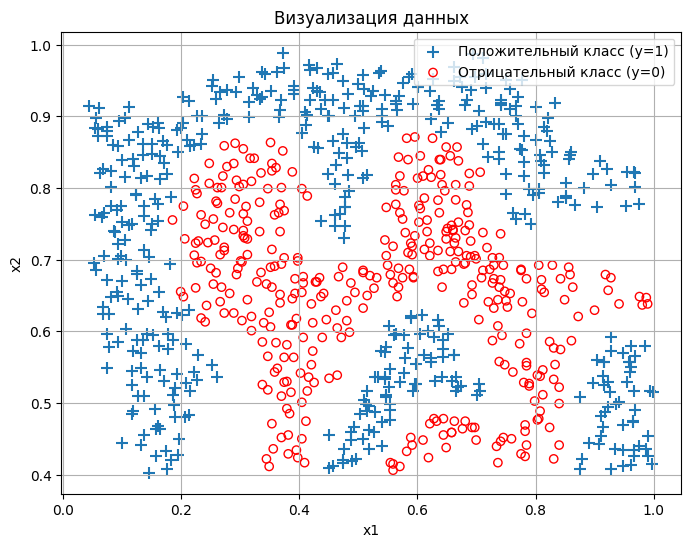

In [35]:
mat = scipy.io.loadmat('./data/ex3data2.mat')
X = mat["X"]
y = mat["y"]

plt.figure(figsize=(12,8))
plotData(X, y)

## Часть 5: Обучение SVM с радиальной базисной функцией Гаусса (Набор данных 2)

Используя SVM с ядром Гаусса, построить нелинейную границу раздела, которая наиболее точно подойдет для классификации предоставленного набора данных.

Если Вы правильно написали программу расчета ядра Гаусса, ноутбук продолжит обучение алгоритма, используя 2-й набор данных. На графике (рис. 5) изображена граница раздела 2-х областей, найденная с помощью метода опорных векторов с ядром Гаусса.


In [36]:
def visualizeBoundary(X, y, model, varargin=0):
    x1plot = np.linspace(X[:,0].min(), X[:,0].max(), 100).T
    x2plot = np.linspace(X[:,1].min(), X[:,1].max(), 100).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        this_X = np.column_stack((X1[:, i], X2[:, i]))
        vals[:, i] = model.predict(gaussianKernelGramMatrix(this_X, X))
    plotData(X, y)
    plt.contour(X1, X2, vals, colors="blue", levels=[0], linewidth=10, label='Граница классов')

[LibSVM]

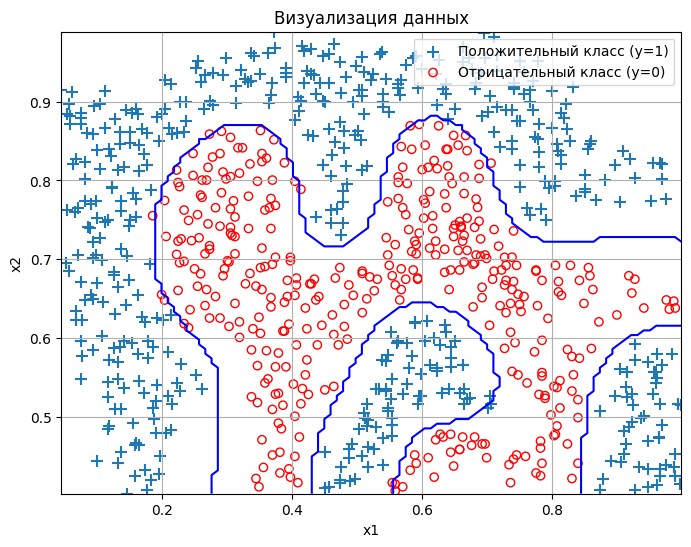

In [37]:
C = 1
sigma = 0.1

model = svmTrain(X, y, C, "gaussian_rbf", sigma=sigma)
visualizeBoundary(X, y, model)

## Часть 6: Визуализация обучающего набора 3

В этой части упражнения Вы усовершенствуете свои навыки по использованию метода опорных векторов с ядром Гаусса для проведения нелинейной классификации данных. Следующая часть ноутбука загрузит и отобразит график с набором данных для этой части упражнения

<Figure size 1200x800 with 0 Axes>

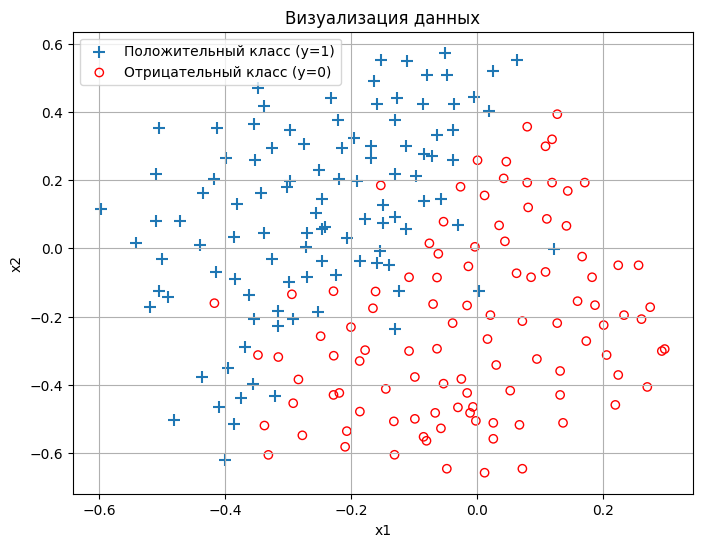

In [38]:
mat = scipy.io.loadmat('./data/ex3data3.mat')
X = mat["X"]
y = mat["y"]

plt.figure(figsize=(12,8))
plotData(X, y)

In [44]:
def dataset3Params(X, y, Xval, yval):
    '''
    DATASET3PARAMS возвращает искомые параметры C и sigma для третьей части
    упражнения, в котором требуется определить оптимальные значения (C, sigma)
    для эффективного использования SVM с некоторой радиальной базисной функцией
    (например, c гауссовским ядром)

    Следует запрограммировать функцию, используя метод перекрестной проверки (кросс-валидация).

    Указание: Необходимо также рассчитать ошибку для набора данных, выбранных для проверки.
                Ошибка определяет долю примеров для перекрестной проверки, классифицированных
                неправильно.
    '''
    values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    best_C = None
    best_sigma = None
    min_loss = np.inf

    y_flat = y.flatten()
    yval_flat = yval.flatten()

    for C in values:
        for sigma in values:
            # 1) Матрица Грама для обучения
            K_train = gaussianKernelGramMatrix(X, X, sigma=sigma)
            # 2) Обучаем SVM с предвычисленным ядром
            model = svm.SVC(C=C, kernel='precomputed')
            model.fit(K_train, y_flat)
            
            # 3) Матрица Грама для валидации
            K_val = gaussianKernelGramMatrix(Xval, X, sigma=sigma)
            # 4) Предсказание и вычисление ошибки
            preds = model.predict(K_val)
            loss = np.mean(preds != yval_flat)
            
            # 5) Запоминаем лучшие параметры
            if loss < min_loss:
                min_loss = loss
                best_C = C
                best_sigma = sigma
        
    return best_C, best_sigma                    

## Часть 7: Обучение SVM с радиальной базисной функцией Гаусса (Набор данных 3)

In [45]:
Xval = mat["Xval"]
yval = mat["yval"]

# Задание: Определить оптимальные параметры С и σ, используя метод перекрестной проверки с помощью множества Хval, yval.
C, sigma = dataset3Params(X, y, Xval, yval)
print("Best parameters are C={:.2f}, sigma={:.2f}".format(C, sigma))

Best parameters are C=1.00, sigma=0.10


[LibSVM]

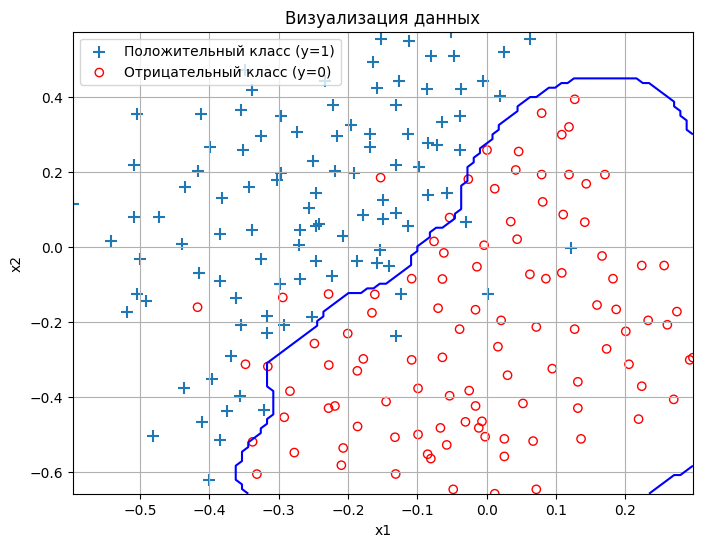

In [46]:
model = svmTrain(X, y, C, "gaussian_rbf", sigma=sigma)
visualizeBoundary(X, y, model)